In [1]:
import PIL.Image as pilimg
import numpy as np
import cv2
import matplotlib.pyplot as plt
import cvlib as cv
from cvlib.object_detection import draw_bbox

Using TensorFlow backend.


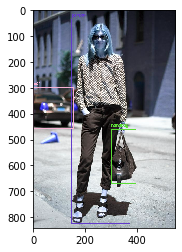

In [17]:
# Read image
num = '0910'
im2 = cv2.imread('C:\\Users\\student\\trip_fashion\\dataset\\clothing-co-parsing\\photos\\'+num+'.jpg')
bbox, label, conf = cv.detect_common_objects(im2)
output_image = draw_bbox(im2, bbox, label, conf)
plt.imshow(output_image)
plt.show()
# Display image
# im.show()
 
# Fetch image pixel data to numpy array
im = pilimg.open('C:\\Users\\student\\trip_fashion\\dataset\\clothing-co-parsing\\photos\\'+num+'.jpg')
pix = np.array(im)

In [18]:
print(bbox)
print(label)

[[149, 34, 373, 824], [2, 298, 156, 458], [300, 460, 396, 670]]
['person', 'car', 'handbag']


In [19]:
label.index('person')

0

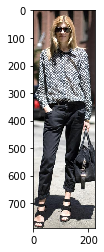

In [20]:
plt.imshow(pix[bbox[0][1]:bbox[0][3], bbox[0][0]:bbox[0][2]])

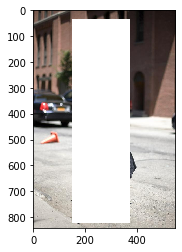

In [21]:
cloth = pix.copy()[bbox[0][1]:bbox[0][3], bbox[0][0]:bbox[0][2]]
pix[bbox[0][1]:bbox[0][3], bbox[0][0]:bbox[0][2]] = -1
plt.imshow(pix)

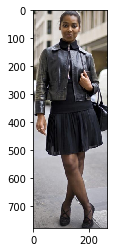

In [7]:
plt.imshow(cloth)

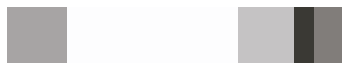

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


def find_histogram(clt):
    """
    create a histogram with k clusters
    :param: clt
    :return:hist
    """
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    hist = hist.astype("float")
    hist /= hist.sum()

    return hist
def plot_colors2(hist, centroids):
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0

    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar

# img = cv2.imread("pic/img7.jpeg")
# img = cv2.cvtColor(cloth, cv2.COLOR_BGR2RGB)
img = pix.copy()

img = img.reshape((img.shape[0] * img.shape[1],3)) #represent as row*column,channel number
clt = KMeans(n_clusters=5) #cluster number
clt.fit(img)

hist = find_histogram(clt)
bar = plot_colors2(hist, clt.cluster_centers_)

plt.axis("off")
plt.imshow(bar)
plt.show()

In [9]:
# from PIL import Image

clt.cluster_centers_

array([[167.55348315, 164.34944953, 164.57613498],
       [253.61698211, 253.84960813, 254.12845679],
       [197.60219643, 195.70005986, 196.25614167],
       [ 58.18888729,  57.41096137,  52.28423177],
       [129.18180619, 125.54882199, 122.56064164]])

import sys                      # System bindings
import cv2                      # OpenCV bindings
import numpy as np
from collections import Counter
 
class BackgroundColorDetector():
    def __init__(self, imageLoc):
        self.img = imageLoc
        self.manual_count = {}
        self.w, self.h, self.channels = self.img.shape
        self.total_pixels = self.w*self.h
 
    def count(self):
        for y in range(0, self.h):
            for x in range(0, self.w):
                RGB = (self.img[x,y,2],self.img[x,y,1],self.img[x,y,0])
                if RGB in self.manual_count:
                    self.manual_count[RGB] += 1
                else:
                    self.manual_count[RGB] = 1
 
    def average_colour(self):
        red = 0; green = 0; blue = 0;
        sample = 10
        for top in range(0, sample):
            red += self.number_counter[top][0][0]
            green += self.number_counter[top][0][1]
            blue += self.number_counter[top][0][2]
 
        average_red = red / sample
        average_green = green / sample
        average_blue = blue / sample
        print( "Average RGB for top ten is: (", average_red, ", ", average_green, ", ", average_blue, ")")
 
    def twenty_most_common(self):
        self.count()
        self.number_counter = Counter(self.manual_count).most_common(2)
        tmp=[]
        for rgb, value in self.number_counter:
            tmp.append(rgb)
#             print( rgb, value, ((float(value)/self.total_pixels)*100))
        return tmp
 
    def detect(self):
        self.twenty_most_common()
        self.percentage_of_first = (float(self.number_counter[0][1])/self.total_pixels)
        print (self.percentage_of_first)
        if self.percentage_of_first > 0.5:
            print ("Background color is ", self.number_counter[0][0])
        else:
            self.average_colour()
 
if __name__ == "__main__":
    if (len(sys.argv) != 2):                        # Checks if image was given as cli argument
        print ("error: syntax is 'python main.py /example/image/location.jpg'")
    else:
        BackgroundColor = BackgroundColorDetector(sys.argv[1])
        BackgroundColor.twenty_most_common()

c = BackgroundColorDetector(cloth)
c.twenty_most_common()